In [ ]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.datasets import CIFAR10, MNIST
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as T
from torchvision.models import resnet18

In [ ]:
train_set = CIFAR10(root='/', download=True, train=True, transform=T.ToTensor())
train_set, val_set = torch.utils.data.random_split(train_set, [0.8, 0.2])
test_set = CIFAR10(root='/', download=True, train=False, transform=T.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [ ]:
model = resnet18(pretrained=True)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.fc = nn.Linear(512, 10)

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

lr=1e-4
num_epochs=10
criterion=nn.CrossEntropyLoss()

optimizer=optim.Adam(model.parameters(), lr=lr)

In [ ]:
%%time

val_losses = []
train_losses = []

for epoch_num in range(num_epochs):
    model.train()

    epoch_losses = 0

    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        batch_y_preds = model(batch_x)

        loss = criterion(batch_y_preds, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses += (len(batch_y)*loss.item())

    epoch_loss = epoch_losses/len(train_loader.dataset)
    train_losses.append(epoch_loss)

    model.eval()
    correctly_labelled = 0
    with torch.no_grad():
        val_epoch_losses = 0
        for val_batch_x, val_batch_y in val_loader:
            val_batch_x = val_batch_x.to(device)
            val_batch_y = val_batch_y.to(device)

            val_batch_y_preds = model(val_batch_x)
            val_loss = criterion(val_batch_y_preds, val_batch_y)
            val_epoch_losses += (len(val_batch_y)*val_loss.item())

            correctly_labelled += (val_batch_y_preds.argmax(dim=1) == val_batch_y).sum().item()

        val_epoch_loss = val_epoch_losses/len(val_loader.dataset)
        val_losses.append(val_epoch_loss)

    print(f'Epoch: {epoch_num}, train_loss={epoch_loss}, val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(val_loader.dataset)} correctly ({correctly_labelled/len(val_loader.dataset)*100}% accuracy)')
print('Training Done')

Epoch: 0, train_loss=2.1482462009429932, val_loss=1.92243489112854. labelled 3334/10000 correctly (33.339999999999996% accuracy)
Epoch: 1, train_loss=1.8310253160476684, val_loss=1.7682849805831908. labelled 3929/10000 correctly (39.290000000000006% accuracy)
Epoch: 2, train_loss=1.7338214820861817, val_loss=1.7094443748474122. labelled 4160/10000 correctly (41.6% accuracy)
Epoch: 3, train_loss=1.6869874685287476, val_loss=1.6723363162994385. labelled 4296/10000 correctly (42.96% accuracy)
Epoch: 4, train_loss=1.6580499084472655, val_loss=1.6490480171203614. labelled 4349/10000 correctly (43.49% accuracy)
Epoch: 5, train_loss=1.6309463632583618, val_loss=1.636291713142395. labelled 4402/10000 correctly (44.019999999999996% accuracy)
Epoch: 6, train_loss=1.6166011754989624, val_loss=1.6227040302276612. labelled 4454/10000 correctly (44.54% accuracy)
Epoch: 7, train_loss=1.6001444622039795, val_loss=1.610023844909668. labelled 4494/10000 correctly (44.940000000000005% accuracy)
Epoch: 8,

In [ ]:
for param in model.parameters():
    param.requires_grad = True

In [ ]:
%%time

val_losses = []
train_losses = []

for epoch_num in range(num_epochs):
    model.train()

    epoch_losses = 0

    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        batch_y_preds = model(batch_x)

        loss = criterion(batch_y_preds, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses += (len(batch_y)*loss.item())

    epoch_loss = epoch_losses/len(train_loader.dataset)
    train_losses.append(epoch_loss)

    model.eval()
    correctly_labelled = 0
    with torch.no_grad():
        val_epoch_losses = 0
        for val_batch_x, val_batch_y in val_loader:
            val_batch_x = val_batch_x.to(device)
            val_batch_y = val_batch_y.to(device)

            val_batch_y_preds = model(val_batch_x)
            val_loss = criterion(val_batch_y_preds, val_batch_y)
            val_epoch_losses += (len(val_batch_y)*val_loss.item())

            correctly_labelled += (val_batch_y_preds.argmax(dim=1) == val_batch_y).sum().item()

        val_epoch_loss = val_epoch_losses/len(val_loader.dataset)
        val_losses.append(val_epoch_loss)

    print(f'Epoch: {epoch_num}, train_loss={epoch_loss}, val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(val_loader.dataset)} correctly ({correctly_labelled/len(val_loader.dataset)*100}% accuracy)')
print('Training Done')

Epoch: 0, train_loss=1.0019244759559631, val_loss=0.7437399120330811. labelled 7403/10000 correctly (74.03% accuracy)
Epoch: 1, train_loss=0.6044204613208771, val_loss=0.6641092619419098. labelled 7739/10000 correctly (77.39% accuracy)
Epoch: 2, train_loss=0.4331920800924301, val_loss=0.6419153155326843. labelled 7882/10000 correctly (78.82000000000001% accuracy)
Epoch: 3, train_loss=0.3077313710689545, val_loss=0.6681071364879608. labelled 7879/10000 correctly (78.79% accuracy)
Epoch: 4, train_loss=0.21897355932593346, val_loss=0.6994491969108582. labelled 7934/10000 correctly (79.34% accuracy)
Epoch: 5, train_loss=0.16950663396120072, val_loss=0.7398493370056153. labelled 7974/10000 correctly (79.74% accuracy)
Epoch: 6, train_loss=0.1370292996674776, val_loss=0.7713030190467834. labelled 7967/10000 correctly (79.67% accuracy)
Epoch: 7, train_loss=0.11223473847061395, val_loss=0.8318769368171692. labelled 7907/10000 correctly (79.07% accuracy)
Epoch: 8, train_loss=0.09866741246953607,

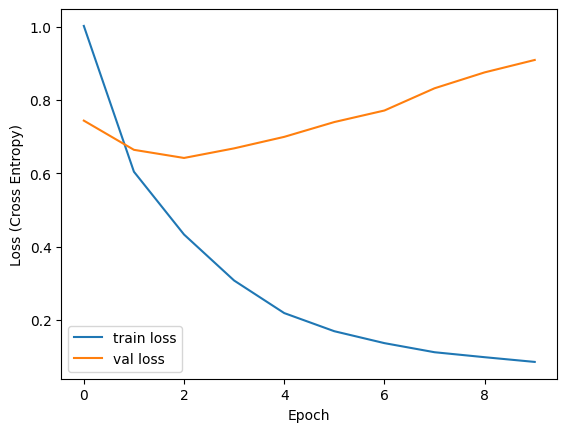

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')
plt.legend()
plt.show()

In [ ]:
model.eval()
correctly_labelled = 0
with torch.no_grad():
    val_epoch_losses = 0
    for test_batch_x, test_batch_y in test_loader:
        test_batch_x = test_batch_x.to(device)
        test_batch_y = test_batch_y.to(device)

        test_batch_y_preds = model(test_batch_x)
        test_loss = criterion(test_batch_y_preds, test_batch_y)

        correctly_labelled += (test_batch_y_preds.argmax(dim=1) == test_batch_y).sum().item()

    test_epoch_loss = val_epoch_losses/len(test_loader.dataset)
    print(f'Labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({correctly_labelled/len(test_loader.dataset)*100}% accuracy)')


Labelled 7949/10000 correctly (79.49000000000001% accuracy)
